## Sensitivity analysis

In [57]:
import numpy as np
import copy as copy
import os
import scipy
import scipy.io as sio

import fba

base_folder=''
seed = 0
dataPath = '/Users/marcobarsacchi/Development/DATA/'

model = fba.load_mat_atp(base_folder + 'iJO1366_Ecoli_atp.mat')
model.g = np.ones_like(model.g)
p_model = fba.load_mat_atp(base_folder + 'iJO1366_Ecoli_atp.mat')
p_model.g = np.ones_like(p_model.g)

rules = [str(rule[0]).replace("'",'').replace('[','').replace(']','') for rule in scipy.io.loadmat(base_folder + 'geni_reazioni.mat')['geni_reazioni']]


file_list = filter(lambda name: name.startswith('pareto_'),os.listdir(dataPath))
print('Found data files' )
loaded_matrix = np.vstack([np.load(dataPath+fname) for fname in file_list]).T

rules = [str(rule[0]).replace("'",'').replace('[','').replace(']','') for rule in scipy.io.loadmat('geni_reazioni.mat')['geni_reazioni']]
genes = [gene[0][0] for gene in scipy.io.loadmat('geni.mat')['geni']]
IND_SIZE = 1367

Found data files


In [56]:
import copy
import fba
from gene_utils import apply_r_set


def evaluate(individual,genes,model,p_model,rules,fluxes=False):
    local_model = copy.copy(model)
    expression_dict = {gene:value for gene,value in zip(genes, individual)}
    local_model = apply_r_set(local_model, expression_dict, p_model, genes, rules)

    return fba.solve_or_bylayer_norm(local_model, solver = 'ortools',fluxes=fluxes)

In [61]:
complete = []
individual = [1 for k in range(IND_SIZE)]
model.lb[model.reactions.index('EX_o2(e)')] = -10
p_model.lb[p_model.reactions.index('EX_o2(e)')] = -10
model.lb[model.reactions.index('EX_glc(e)')] = -10
p_model.lb[p_model.reactions.index('EX_glc(e)')] = -10

l0,l1 = evaluate(individual, genes, model, p_model, rules)
complete.append([-1,'all',l0,l1])
for ind,name in enumerate(genes):
    individual = [1 for k in range(IND_SIZE)]
    individual[ind] = 0
    l0,l1 = evaluate(individual, genes, model, p_model, rules)
    complete.append([ind,name,l0,l1])
    if ind%100 ==1:
        print('GENE %d'%ind)

GENE 1
GENE 101
GENE 201
GENE 301
GENE 401
GENE 501
GENE 601
GENE 701
GENE 801
GENE 901
GENE 1001
GENE 1101
GENE 1201
GENE 1301


In [62]:
import pandas as pd 
robustness = pd.DataFrame(complete,columns=['Gene Index', 'Gene Name','f_obj','g_obj'])
robustness.to_csv('sensitivity/robustness_-10-10.csv',index=None)

In [59]:
import pandas as pd 
robustness = pd.read_csv('sensitivity/robustness_-10-10.csv.csv',index_col=None)
robustness

Gene Index Gene Name         f_obj       g_obj
0             -1       all  1.033494e+00   43.977714
1              0     b0002  1.033494e+00   43.977714
2              1     b0003  0.000000e+00 -413.220000
3              2     b0004  1.033494e+00   43.977714
4              3     b0007  1.033494e+00   43.977714
5              4     b0008  1.033494e+00   43.977714
6              5     b0009  2.316398e-01 -362.159365
7              6     b0019  1.033494e+00   43.977714
8              7     b0025  1.033494e+00   43.977714
9              8     b0026  0.000000e+00 -413.220000
10             9     b0029  0.000000e+00 -413.220000
11            10     b0030  1.033494e+00   43.980027
12            11     b0031  1.033494e+00   43.977714
13            12     b0032  1.019822e+00   44.718805
14            13     b0033  1.019822e+00   44.718805
15            14     b0036  1.033494e+00   43.977714
16            15     b0037  1.033494e+00   43.977714
17            16     b0038  1.630076e-10 -413.220000
18            17     b0040  1.033494e+00   43.977714
19            18     b0047  1.033494e+00   43.977714
20            19     b0048  1.033494e+00   43.977714
21            20     b0049  0.000000e+00 -413.220000
22            21     b0052  1.033494e+00   43.977714
23            22     b0061  1.033494e+00   43.977714
24            23     b0062  0.000000e+00 -413.220000
25            24     b0063  1.033494e+00   43.977714
26            25     b0066  1.033494e+00   43.977714
27            26     b0067  1.033494e+00   43.977714
28            27     b0068  1.033494e+00   43.977714
29            28     b0070  1.033494e+00   43.977714
...          ...       ...           ...         ...
1338        1337     b4322  1.033494e+00   43.977714
1339        1338     b4323  1.033494e+00   43.977714
1340        1339     b4356  1.033494e+00   43.977714
1341        1340     b4358  1.033494e+00   43.977714
1342        1341     b4367  1.033494e+00   43.977714
1343        1342     b4374  1.033494e+00   43.977714
1344        1343     b4381  0.000000e+00 -413.220000
1345        1344     b4382  1.033494e+00   43.977714
1346        1345     b4383  1.033494e+00  146.694466
1347        1346     b4384  1.033494e+00   43.980027
1348        1347     b4386  0.000000e+00 -413.220000
1349        1348     b4388  1.033494e+00   43.977714
1350        1349     b4390  1.033494e+00   43.977714
1351        1350     b4392  1.033494e+00   43.977714
1352        1351     b4394  1.033494e+00   43.977714
1353        1352     b4395  1.033494e+00   43.977714
1354        1353     b4407  1.033494e+00   43.977714
1355        1354     b4460  1.033494e+00   43.977714
1356        1355     b4467  1.033490e+00   43.979297
1357        1356     b4468  1.033490e+00   43.979297
1358        1357     b4471  1.033494e+00   43.977714
1359        1358     b4474  1.033494e+00   43.977714
1360        1359     b4476  1.033494e+00   43.977714
1361        1360     b4477  0.000000e+00 -413.220000
1362        1361     b4478  1.033494e+00   43.977714
1363        1362     b4481  1.033494e+00   43.977714
1364        1363     b4485  1.033494e+00   43.977714
1365        1364     b4513  1.033494e+00   43.977714
1366        1365     b4544  1.033494e+00   43.977714
1367        1366     s0001  0.000000e+00 -393.220000

[1368 rows x 4 columns]

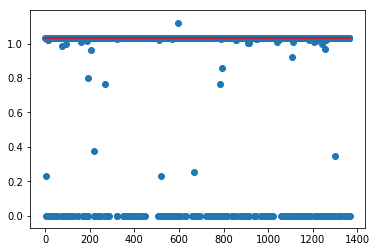

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(robustness['Gene Index'][1:], robustness['f_obj'][1:])
plt.plot([0,1366],[robustness['f_obj'][0],robustness['f_obj'][0]],'r')

In [ ]:
complete = []
individual = [1 for k in range(IND_SIZE)]
model.lb[model.reactions.index('EX_o2(e)')] = -10
p_model.lb[p_model.reactions.index('EX_o2(e)')] = -10
model.lb[model.reactions.index('EX_glc(e)')] = -20
p_model.lb[p_model.reactions.index('EX_glc(e)')] = -20

l0,l1 = evaluate(individual, genes, model, p_model, rules)
complete.append([-1,'all',l0,l1])
for ind,name in enumerate(genes):
    individual = [1 for k in range(IND_SIZE)]
    individual[ind] = 0
    l0,l1 = evaluate(individual, genes, model, p_model, rules)
    complete.append([ind,name,l0,l1])
    if ind%100 ==1:
        print('GENE %d'%ind)

In [ ]:
import pandas as pd 
robustness = pd.DataFrame(complete,columns=['Gene Index', 'Gene Name','f_obj','g_obj'])
robustness.to_csv('sensitivity/robustness_-10-30.csv',index=None)